# Final Report: Analysis On Factors Leading to Obesity in America
## Project Introduction
With obesity at all time rates in the United States it is important to understand the individuals most at risk. This analysis is focused on the critical issue of obesity among individuals in America, exploring data from selected population characteristics. This information was made available by the Centers of Disease Control and Prevention (CDC). Our goals are to investigate if race plays a role in being at risk of obesity, if income is the leading factor in obesity, and to explore other interesting relationships found within the data. 

**Github Repository**: https://github.com/uic-cs418/group-project-mind-masters

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
from obesity_children import * #cleaning python file
import data1_helper # for analyzing data 1

## Reading Data / Cleaning Data
**Data - Obesity Among Children and Adolescents 2-19**

**Data - Obesity Among Adults 20+**

In [3]:
obesity_adult = pd.read_csv("Normal_weight__overweight__and_obesity_among_adults_aged_20_and_over__by_selected_characteristics__United_States.csv")
panelDict, unitDict, stubNameDict, stubLabelDict, yearDict, ageDict = data1_helper.getMapping(obesity_adult)
raceGender_df = data1_helper.cleanGenderRace(obesity_adult)
age_df = data1_helper.cleanAge(obesity_adult)
raceGender_df.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG,Gender,Race
49,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Sex and race and Hispanic origin,4,Male: Not Hispanic or Latino: White only,3.111,2015-2018,10,20 years and over,1.0,23.4,1.4,.,Male,White
59,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Sex and race and Hispanic origin,4,Female: Not Hispanic or Latino: White only,3.112,2015-2018,10,20 years and over,1.0,31.9,1.7,.,Female,White
79,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Sex and race and Hispanic origin,4,Male: Not Hispanic or Latino: Black or African...,3.121,2015-2018,10,20 years and over,1.0,26.4,1.7,.,Male,Black or African American
89,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Sex and race and Hispanic origin,4,Female: Not Hispanic or Latino: Black or Afric...,3.122,2015-2018,10,20 years and over,1.0,19.2,1.2,.,Female,Black or African American
109,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Sex and race and Hispanic origin,4,Male: Not Hispanic or Latino: Asian only,3.131,2015-2018,10,20 years and over,1.0,41.9,1.7,.,Male,Asian


**Data - Nutrition, Physical Activity, and Obesity**

## Machine Learning Analysis
**Linear Regression Model**

**Question**: Based on the trend of the rate of obesity of adult in the US between 1988 and 2018, what will be the rate of obesity in the US in 2024?

In [5]:
from scipy import stats
import sklearn.metrics as sm

# prepare data for ML
middleYearDict = data1_helper.getMiddleYear(yearDict)  
generalObesity = data1_helper.getFilteredData(obesity_adult, 1, 3, 1, 1.1, middleYearDict)
x = generalObesity["MiddleYear"]
y = generalObesity["ESTIMATE"]

In [6]:
# baseline ML model: mean
baselineML = data1_helper.MeanModel()
data1_helper.fitAndEvaluate(baselineML, x, y)

mean squared error:  22.442400000000003


In [7]:
# linear regression model
linRegressML = data1_helper.LinearRegressionModel()
data1_helper.fitAndEvaluate(linRegressML, x, y)

mean squared error:  0.5901431713657087


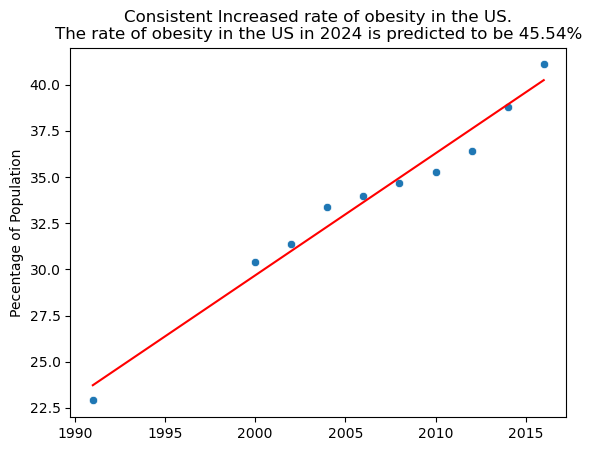

In [8]:
data1_helper.plotML(generalObesity, linRegressML, x) # plot data and best fit line

**Comment:** The linear regression outperforms the baseline model with mean squared error = 1. The model predicts that in 2024, 45.54% of the population in US are obese. The result is reasonable in the fact that the rate of obesity always increases according to our data and 2024 is close to this year range 1988-2018 so it is safe to predict based on this trend.

**Logistic Regression**

## Visualizations + Additional Visualization
**Wealthy adults in 2018 are more likely to be obese than Low-Income Adults in 1988**

**Hispanic individuals aged 2-19 have the highest obesity rate from 1988-2018**

**Asians have less obesity rate than people of other races in all levels of Obesity**


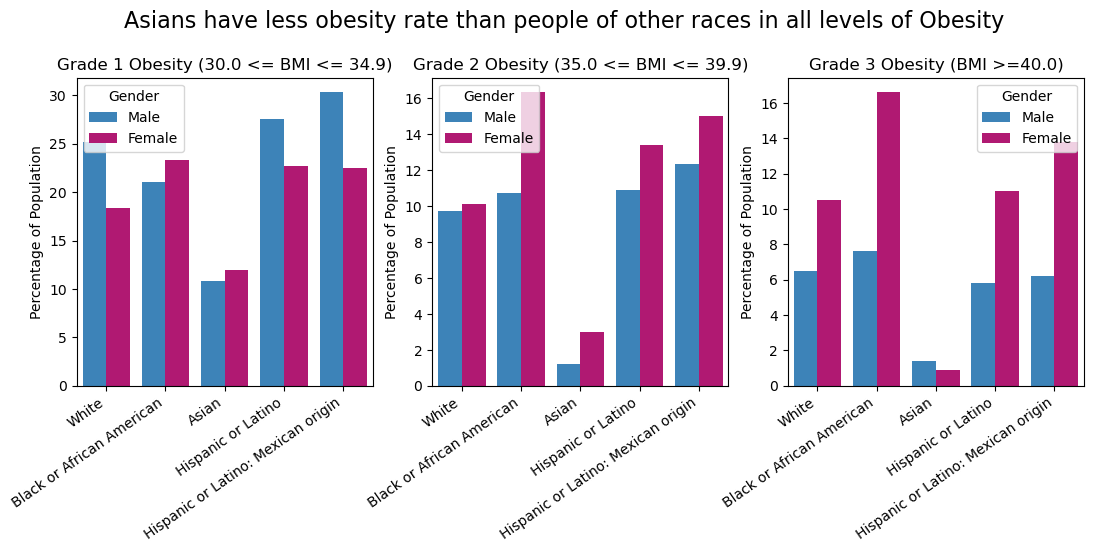

In [4]:
data1_helper.obesityRaceVsObesity(raceGender_df)

**Description:** We created this visualization to test the hypothesis that Asians have a lower obesity rate than other races, the visualization shows that Asians have a lower obesity level than other races in all 3 different types of obesity:

Obesity grade 1: 10% asians have grade 1 obesity and other races average is around 20%;

Obesity grade 2: 4% of Asians have grade 2 obesity and other races average is around 10%;

Obesity grade 3: 1% of Asians have grade 3 obesity and other races average is around 9%

**Interactive Visualization**

Directions on how to access interactive visualization in README.

## Results
Fully explain and analyze the results from your data, i.e. the inferences or correlations you uncovered, the tools you built, or the visualizations you created. 